In [1]:
import pandas as pd
import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import re

In [360]:
# INPUTS:

# data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/"
data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/"

training_data_name = "tiling"

data_name = "yeast_chrI_1bpresolution_subsequence50" # csv

data_file_type = ".csv"

sequence_column_name = "sequence"

In [361]:
cn_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv")

In [362]:
cn_avg_pred_df

,n=26,n=29,n=31,C0
0,0.040002,0.517600,0.430967,0.184158
1,-0.274829,0.606195,0.556751,0.040582
2,-0.419413,0.511165,0.827969,0.079201
3,-0.456370,0.351507,0.648395,-0.013701
4,-0.205379,-0.199728,0.536964,0.127099
...,...,...,...,...
230164,-0.014929,0.070551,0.019504,-0.005064
230165,-0.198133,0.073535,0.146789,-0.061194
230166,-0.263288,0.237972,0.294282,-0.045974
230167,-0.240858,0.189720,0.352625,-0.002832


In [363]:
genome_df_chrI = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_smoothC0.csv")

In [364]:
genome_df_chrI

,sequence,chrID,position,smoothC0
0,CCACACCACACCCACACACCCACACACCACACCACACACCACACCA...,chrI,0,NaN
1,CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...,chrI,1,NaN
2,ACACCACACCCACACACCCACACACCACACCACACACCACACCACA...,chrI,2,NaN
3,CACCACACCCACACACCCACACACCACACCACACACCACACCACAC...,chrI,3,NaN
4,ACCACACCCACACACCCACACACCACACCACACACCACACCACACC...,chrI,4,NaN
...,...,...,...,...
230164,TGGGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTG...,chrI,230164,NaN
230165,GGGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGT...,chrI,230165,NaN
230166,GGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGTG...,chrI,230166,NaN
230167,GTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGTGT...,chrI,230167,NaN


In [365]:
genome_df_chrI = pd.concat([genome_df_chrI, cn_avg_pred_df], axis=1)

In [366]:
genome_df_chrI

,sequence,chrID,position,smoothC0,n=26,n=29,n=31,C0
0,CCACACCACACCCACACACCCACACACCACACCACACACCACACCA...,chrI,0,NaN,0.040002,0.517600,0.430967,0.184158
1,CACACCACACCCACACACCCACACACCACACCACACACCACACCAC...,chrI,1,NaN,-0.274829,0.606195,0.556751,0.040582
2,ACACCACACCCACACACCCACACACCACACCACACACCACACCACA...,chrI,2,NaN,-0.419413,0.511165,0.827969,0.079201
3,CACCACACCCACACACCCACACACCACACCACACACCACACCACAC...,chrI,3,NaN,-0.456370,0.351507,0.648395,-0.013701
4,ACCACACCCACACACCCACACACCACACCACACACCACACCACACC...,chrI,4,NaN,-0.205379,-0.199728,0.536964,0.127099
...,...,...,...,...,...,...,...,...
230164,TGGGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTG...,chrI,230164,NaN,-0.014929,0.070551,0.019504,-0.005064
230165,GGGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGT...,chrI,230165,NaN,-0.198133,0.073535,0.146789,-0.061194
230166,GGTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGTG...,chrI,230166,NaN,-0.263288,0.237972,0.294282,-0.045974
230167,GTGTGGGTGTGGTGTGGTGTGTGGGTGTGGTGTGGGTGTGGTGTGT...,chrI,230167,NaN,-0.240858,0.189720,0.352625,-0.002832


In [367]:
alpha_val=0.3

In [368]:
starting_point = 0

# starting_point=3200 # High Value Problem Region
# starting_point=6600 # Mid Value Problem Region
# starting_point=21700 # Problem Region
# starting_point=22500 # Problem-ish Region
# starting_point=23600 # Mid Value Problem Region
# starting_point=38500 # High Value Problem Region
# starting_point=42300 # High Value Problem Region
# starting_point=62500 # High Value Problem Region
# starting_point=70800 # Mid Value Problem Region
# starting_point=74700 # High Value Problem Region
# starting_point=80400 # High Value Problem Region
# starting_point=90300 # High Value Problem Region
# starting_point=91100 # High Value Problem Region
# starting_point=92800 # High Value Problem Region
# starting_point=101200 # Mid Value Problem Region
# starting_point=101800 # High Value Problem Region
# starting_point=102800 # Disparity Problem Region
# starting_point=109000 # High Value Problem Region
# starting_point=110600 # Low Value Problem-ish Region
# starting_point=118400 # Low Value Problem-ish Region
# starting_point=118700 # Low Value Problem-ish Region
# starting_point=122800 # Mid/High Value Problem Region
# starting_point=129600 # High Value Problem Region
# starting_point=141800 # Low Value Problem Region
# starting_point=145700 # High Value Problem Region
# starting_point=146100 # High Value Problem Region
# starting_point=147300 # Mid Value Problem-ish Region
# starting_point=154000 # Low Value Problem Region
# starting_point=168800 # High Value Problem Region
# starting_point=173600 # High Value Problem Region
# starting_point=183700 # High Value Problem Region
# starting_point=184900 # Mid/High Value Problem Region

sequence_length = 200

In [369]:
# Largest smoothC0 regions:

# starting_point = 213600
# starting_point = 18300
# starting_point = 200400
# starting_point = 143100


# sequence_length=200

In [370]:
# Smallest smoothC0 regions:

starting_point = 154000
# starting_point = 141800
# starting_point = 146100
# starting_point = 227400
# starting_point = 123100
# starting_point = 31500
# starting_point = 196600
# starting_point = 28000


# sequence_length = 200

In [384]:
# Region Divisions:

starting_point = 600
# starting_point = 2300
# starting_point = 2400


# Widest borders between regions:
# starting_point = 29000
# starting_point = 55200
# starting_point = 117000
# starting_point = 143224-24
# starting_point = 144359-59
starting_point = 145800

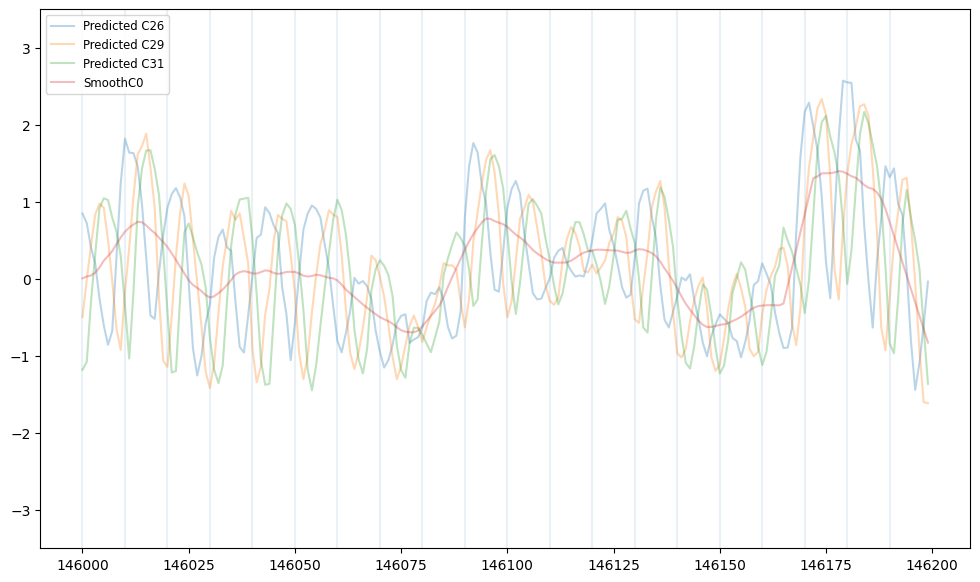

In [386]:
ylims=[-3.5, 3.5]

plt.figure(figsize=(12,7))

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrI["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", alpha=alpha_val, color="C0")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrI["n=29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", alpha=alpha_val, color="C1")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrI["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", alpha=alpha_val, color="C2")

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrI["smoothC0"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", alpha=alpha_val, color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["C0"][range(starting_point, starting_point + sequence_length)], label="Predicted C0", alpha=alpha_val_4)

# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C0", alpha=alpha_val_2, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C26", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C29", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C31", alpha=alpha_val_3, marker="o")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          ((genome_df_chrV["n=26"] + genome_df_chrV["n=31"])/2)[range(starting_point, starting_point + sequence_length)], label="Predicted C26 - C31", alpha=alpha_val, color="C4")

plt.vlines(list(range(starting_point, starting_point+sequence_length, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, No Smoothing")
plt.legend(fontsize="small")
plt.ylim(ylims)
plt.show()

starting_point += sequence_length

In [379]:
starting_point = starting_point - (sequence_length*2)

In [173]:
starting_point/genome_df_chrI.shape[0]

0.23895485491095672